    Atividade 2.1 Parte I

In [1]:
# import os
# from os.path import expanduser

# os.chdir(expanduser("~"))

In [2]:
import pandas as pd
import random
import matplotlib.pyplot as plt
import numpy as np

Função de ativação Degrau com limiar = 0 / Taxa de aprendizado = 0.1 / Pesos = [-0.5:0.5] 

Executar o algoritmo até a convergencia

In [3]:
data_np = np.fromfile('data/dataAll.txt')

In [4]:
N = 3

In [5]:
data = np.ndarray((int(len(data_np)/N),N), buffer=data_np)

In [6]:
data.shape

(1000, 3)

In [7]:
data

array([[-363.7884,  244.1423,    0.    ],
       [ 328.7572, -256.7658,    1.    ],
       [-164.9827,  613.2164,    0.    ],
       ...,
       [ 872.4311,  669.1192,    1.    ],
       [ 822.6894, -702.6489,    1.    ],
       [-140.147 ,  734.0983,    0.    ]])

In [8]:
X = data[:,:N-1]
X[:5]

array([[-363.7884,  244.1423],
       [ 328.7572, -256.7658],
       [-164.9827,  613.2164],
       [ 536.5905,  764.9575],
       [ 314.2297,  343.8375]])

In [9]:
yd = data[:,N-1]
yd[:5]

array([0., 1., 0., 0., 0.])

In [10]:
w_ = np.random.uniform(-0.5,0.5,3)
w_

array([ 0.30249923, -0.04118191, -0.43132662])

In [11]:
x0 = -1

In [12]:
entradas = np.insert(X, 0, x0, axis=1)
entradas

array([[  -1.    , -363.7884,  244.1423],
       [  -1.    ,  328.7572, -256.7658],
       [  -1.    , -164.9827,  613.2164],
       ...,
       [  -1.    ,  872.4311,  669.1192],
       [  -1.    ,  822.6894, -702.6489],
       [  -1.    , -140.147 ,  734.0983]])

In [13]:
np.dot(w_, entradas[0])

-90.6260697649729

In [14]:
yd[0] - 1

-1.0

In [17]:
#! curl -o dataAll.txt "https://docs.google.com/uc?export=download&id=1HrlvFXy4xJhaS2KfAt3CI7HRBjl6g1dk"
#! wget "https://docs.google.com/uc?export=download&id=1HrlvFXy4xJhaS2KfAt3CI7HRBjl6g1dk"

In [21]:
class Perceptron(object):
    """Classificador Perceptron
    """
    def __init__(self, apz=0.1, ini_intervalo = -0.5, fim_intervalo = 0.5, limiar_ativacao = 0):
        self.apz = apz
        self.ini_intervalo = ini_intervalo
        self.fim_intervalo = fim_intervalo
        self.limiar = limiar_ativacao
        self.x0 = -1
    
    def fit(self, X, yd):
        entradas = np.insert(X, 0, x0, axis=1)

        self.w_ = np.random.uniform(self.ini_intervalo, self.fim_intervalo, entradas.shape[1])
        print('Pesos iniciais:', self.w_)
        epcs = 0
        ajustes = 0
        
        while True:
            epcs+=1
            ocorrencia_erro = False

            for xi, target in zip(entradas, yd):
                y = self.predict(xi)
                erro_ = target - y

                if erro_ != 0:
                    delta = self.apz * erro_ * xi
                    self.w_ += delta
                    ajustes += 1

                    ocorrencia_erro = True
                    print('Época', epcs,'. Pesos ajustados: ', self.w_)
            if not ocorrencia_erro:
                break

        print("O número total de ajustes no vetor de pesos: ", ajustes)
        print("O número de épocas até a convergência: ", epcs)
        # print('Ultimos pesos: ', self.w_)
        return self
    
    def u(self, X):
        """Cálculo da entrada da rede antes da ativação"""
        return np.dot(X, self.w_)
    
    def ativacao(self, u):
        """Função Degrau"""
        return np.where(u >= self.limiar, 1, 0)
    
    def predict(self, X):
        return self.ativacao(self.u(X))

In [22]:
rede = Perceptron()

In [23]:
rede = rede.fit(X, yd)
rede.w_

Pesos iniciais: [ 0.0770686  -0.23896574  0.23352633]
Época 1 . Pesos ajustados:  [  0.1770686   36.13987426 -24.18070367]
Época 1 . Pesos ajustados:  [   0.2770686   -17.51917574 -100.67645367]
Época 1 . Pesos ajustados:  [  0.1770686   55.27684426 -64.84689367]
Época 1 . Pesos ajustados:  [7.70686011e-02 1.37875544e+02 1.50089363e+01]
Época 1 . Pesos ajustados:  [  0.1770686  143.72130426 -63.28565367]
Época 1 . Pesos ajustados:  [   0.2770686   103.71239426 -141.17834367]
Época 1 . Pesos ajustados:  [  0.3770686  157.38220426 -92.08607367]
Época 1 . Pesos ajustados:  [   0.2770686   104.42214426 -148.95553367]
Época 1 . Pesos ajustados:  [  0.3770686  163.98166426 -98.83320367]
Época 1 . Pesos ajustados:  [   0.2770686   118.45703426 -164.46913367]
Época 1 . Pesos ajustados:  [  0.3770686  209.17289426 -89.75581367]
Época 1 . Pesos ajustados:  [   0.2770686   151.39190426 -150.06396367]
Época 1 . Pesos ajustados:  [ 1.77068601e-01  1.03125344e+02 -1.98533684e+02]
Época 1 . Pesos aju

array([  -0.4229314 ,  323.17006426, -323.27731367])

In [24]:
data_plot = pd.DataFrame(data, columns = ['x1', 'x2', 'y'])

In [25]:
labels_0 = data_plot.loc[data_plot['y'] == 0]
labels_1 = data_plot.loc[data_plot['y'] == 1]

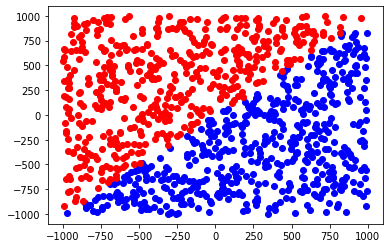

In [26]:
#plt.plot(x, y)       # gráfico de linha
plt.plot(labels_1.x1, labels_1.x2, 'bo')
plt.plot(labels_0.x1, labels_0.x2, 'ro')
# gráfico com pontos
plt.show()  

2.2. Parte II – Experimentação

In [29]:
# apzs = [0.4, 0.1, 0.01]
# lmt = [(-100,100), (-0.5,0.5)]
# N = 10

In [30]:
# for apz in apzs:
#     for ini, fim in lmt:
#         for i in range(1,N+1):
#             print(apz, ini, fim, i)